**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical inversion of bivariate characteristic function

# 2D Numerical inversion CharFunTool

<font size=5> Computational tools: </font>  **<font size=5>MATLAB </font>**  

---

Our code `cf_Ratio_BK.m`, code `cf_Ratio_BKB.m` was created on the code of Mijanović et al.2023 implemented in MATLAB (Witkovský, https://github.com/witkovsky)

**Formula (8)** 2D inversion CF formula for a pdf of RV $(X_1,X_2)$

$$
f\left(x_1, x_2\right)=\frac{1}{2 \pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{e^{-i\left(t_1 x_1+t_2 x_2\right)} \phi(t_1, t_2)\right\} d t_1 d t_2.
$$

**Ref.** 
- Mijanović A., Popović B.V., Witkovský V., 2023. “A Numerical Inversion of the Bivariate Characteristic Function.” Applied Mathematics and Computation 443:127807. https://doi.org/10.1016/j.amc.2022.127807.

- *Example from the code of CharFunTool*  
 https://github.com/witkovsky/CharFunTool/blob/master/CF_InvAlgorithms/cf2Dist2D.m

# Example 1 
The bivariate characteristic function ($\phi(t_1, t_2)$) of bivariate normal distribution

   $$
   \phi(t_1, t_2) = \exp\left( i(t_1 \mu_1 + t_2 \mu_2) - \frac{1}{2} \left( t_1^2 \sigma_{11}^2 + t_2^2 \sigma_{22}^2 + 2 t_1 t_2 \sigma_{12} \right) \right)
   $$

with a mean vector and a covariance matrix given by:

  $$
  \mu = \begin{bmatrix} \mu_1\\ \mu_2 \end{bmatrix}, \quad
  \Sigma = \begin{bmatrix}
  \sigma_{11}^2 & \sigma_{12} \\
  \sigma_{12} & \sigma_{22}^2
  \end{bmatrix}
  $$

**Ref.** Tong, Y. L. 1990. *The Multivariate Normal Distribution*. Springer Series in Statistics. New York: Springer. 

In our example we have the following specific values
$$
\phi(t_1, t_2) = \exp\left( -\frac{1}{2} \left( 0.9 t_1^2 + 0.3 t_2^2 + 2 \times 0.4 \times t_1 t_2 \right) \right)
$$

and the characteristic function describes a bivariate normal distribution with zero mean vector and a covariance matrix given by:

  $$
  \mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad
  \Sigma = \begin{bmatrix}
  0.9 & 0.4 \\
  0.4 & 0.3
  \end{bmatrix}
  $$

In [1]:
% CF of  (X1,X2) ~ BN
cf = @(t) exp(-(0.9*t(:,1).^2 + 0.3*t(:,2).^2 +2*0.4*t(:,1).*t(:,2))/2);

In [2]:
% one value
t = [0.5,1];
cf(t)

ans = 0.6297

In [3]:
% one value for pdf
cf2Dist2D(cf,t).pdf

ans = 0.0352

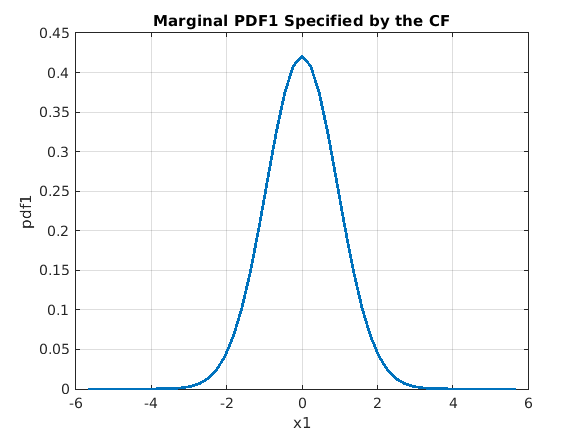

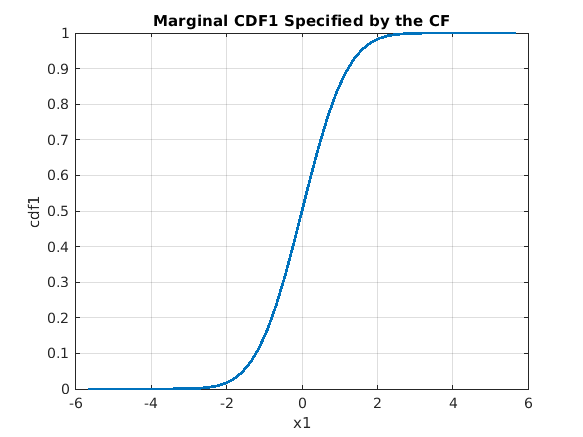

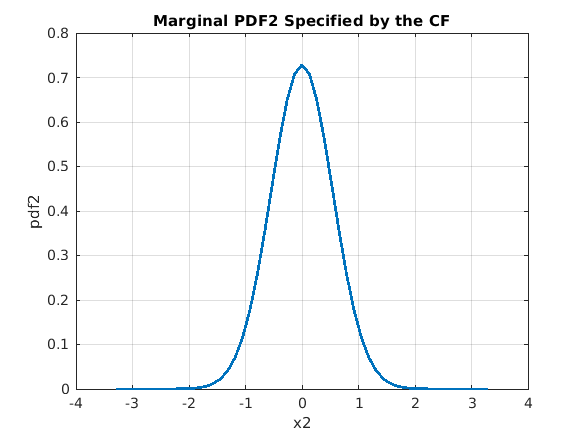

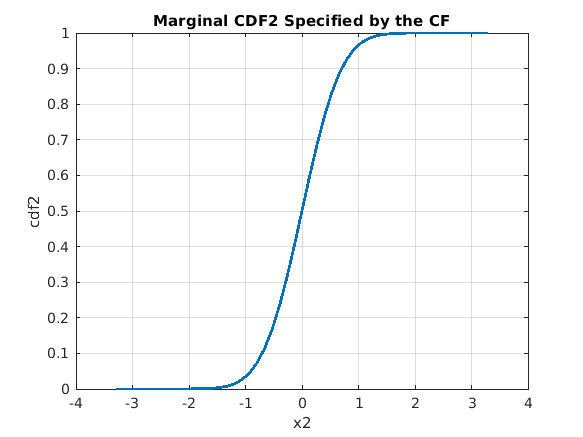

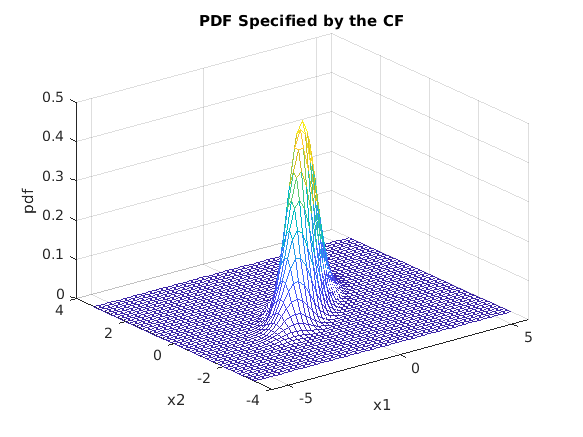

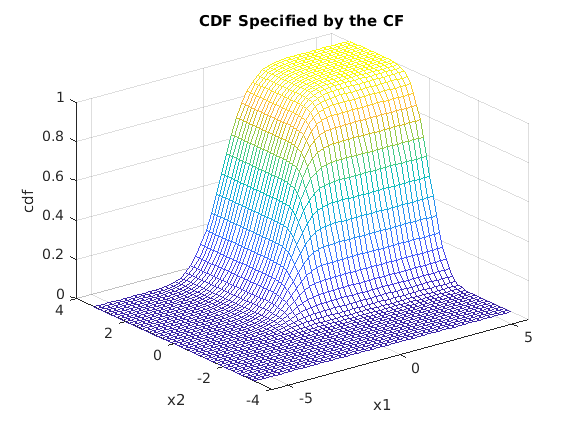

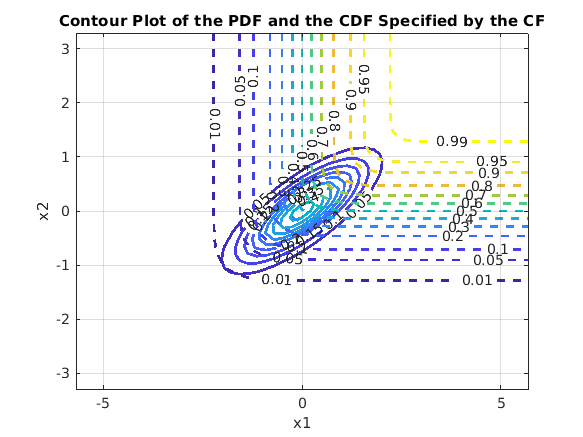

result = struct with fields:
         Description: 'CDF/PDF/QF from the characteristic function CF'
     inversionMethod: 'Gil-Pelaez'
    quadratureMethod: 'Riemann sums quadrature rule'
                   x: [2601x2 double]
                 cdf: [2601x1 double]
                 pdf: [2601x1 double]
                  x1: [51x1 double]
                cdf1: [51x1 double]
                pdf1: [51x1 double]
                  x2: [51x1 double]
                cdf2: [51x1 double]
                pdf2: [51x1 double]
                  X1: [51x51 double]
                  X2: [51x51 double]
                Zcdf: [51x51 double]
                Zpdf: [51x51 double]
                  cf: @(t)exp(-(0.9*t(:,1).^2+0.3*t(:,2).^2+2*0.4*t(:,1).*t(:,2))/2)
            isInterp: 0
        SixSigmaRule: 6
                   N: 256
                  dt: [0.5519 0.9560]
                   T: -14.8173
       PrecisionCrit: 1.0854e-15
     myPrecisionCrit: 1.0000e-12
       isPrecisionOK: 1
               xMean: [0 0]
                xStd: [0.9487 0.5477]
                xMin: [-5.6921 -3.2863]
                xMax: [5.6921 3.2863]
             options: [1x1 struct]
              tictoc: 0.1450

Error using horzcat
The following error occurred converting from double to struct:
Conversion to struct from double is not possible.

In [4]:
% numerical inversion
result = cf2Dist2D(cf)
disp([result, result.cdf])